## Segundo Examen Parcial  de Estadística Aplicada
Enero-Junio 2023

**Nombre: Edwin Javier Hernández Rodríguez** 

**Matricula: 2034175**

**Instrucciones:** En cada punto importa las librerias que consideres necesarias

In [42]:
# Importa las librerias de numpy, python y matplotlib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

%matplotlib inline

In [11]:
#pip install lifelines

In [14]:
# importa la base de datos llamada credit_risk.csv
credit = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
credit.head()

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,real_estate,67,None,own,2,official,1,1,1,1
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,real_estate,22,None,own,1,official,1,0,1,0
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,real_estate,49,None,own,1,unskilled,2,0,1,1
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,life_insurance,45,None,free,1,official,2,0,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,no_property,53,None,free,2,official,2,0,1,0


La base de datos es la información proporcionada por un banco donde nos muestra el tiempo que transcurre desde que un cliente pide un préstamo hasta que lo paga completamente (evento)

a continuación se muestran la descripción de la base de datos



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">   <br>Característica   </th>
    <th class="tg-fymr">   <br>Variable   </th>
    <th class="tg-fymr">   <br>Tipo   </th>
    <th class="tg-fymr">   <br>Descripción   </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">   <br>Time   </td>
    <td class="tg-0pky">   <br>duration   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Duration in month   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Event   </td>
    <td class="tg-0pky">   <br>full_repaid   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Specifies if the loan was fully   repaid   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>age   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Age of the borrower (in years)   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>foreign_worker   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Indicates if the borrower is a   foreign worker   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>personal_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Gender and Marital status   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>people_liable   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Number of people being liable to   provide maintenance for   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>telephone   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Indicates if the borrower owns a   phone   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Employment   </td>
    <td class="tg-0pky">   <br>employment_years   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Years of employment at current job   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Employment   </td>
    <td class="tg-0pky">   <br>job   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Employment status   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Residence   </td>
    <td class="tg-0pky">   <br>housing   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Residential status of the borrower   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Residence   </td>
    <td class="tg-0pky">   <br>present_residence   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Years living at current residence   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>amount   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Amount of money borrowed   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>installment_rate   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Percentage of amount borrowed that   will be charged by a lender to a borrower.   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>purpose   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Reason to get a loan   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>checking_account_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Status of the checking account   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>credit_history   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Credit history of the borrower   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>number_of_credits   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Number of existing credits at this   bank   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>other_installment_plans   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Type of installments plans the   borrower already has   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>savings_account_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Status of the saving account   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Collateral/Guarantor   </td>
    <td class="tg-0pky">   <br>property   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Type of valuable assets the   borrower owns   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Collateral/Guarantor   </td>
    <td class="tg-0pky">   <br>other_debtors   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Indicate if someone else will be   involved in the repayment or is guaranteeing the loan   </td>
  </tr>
</tbody>
</table>

1. El banco sospecha que entre mas pasa el tiempo más díficil es que puedan pagar los clientes que se les concedió un préstamo. 

a) Calcula el promedio del monto del préstamo de los que pagaron y el promedio del monto de los que no han pagado.

b) Ajusta un modelo weibull y un modelo log-normal y graficas las funciones de riesgo respectivas. 


En Full repaid: 
- 1 ya liquidó su pago
- 0 aun no ha pagado

In [15]:
# a) Promedio:

p_liq = round(credit[credit['full_repaid'] == 1]['amount'].mean(),2)
p_pdt = round(credit[credit['full_repaid'] == 0]['amount'].mean(),2)
print(f'El promedio del monto prestado de los que pagaron es de: {p_liq} y de los que no han pagado es de: {p_pdt}')

El promedio del monto prestado de los que pagaron es de: 2985.46 y de los que no han pagado es de: 3938.13


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 300 right-censored observations>
   number of observations = 1000
number of events observed = 700
           log-likelihood = -2948.49
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  28.58       0.63            27.34            29.82
rho_      1.71       0.05             1.61             1.80

          cmp to     z      p   -log2(p)
lambda_     1.00 43.56 <0.005        inf
rho_        1.00 14.26 <0.005     150.91
---
AIC = 5900.98

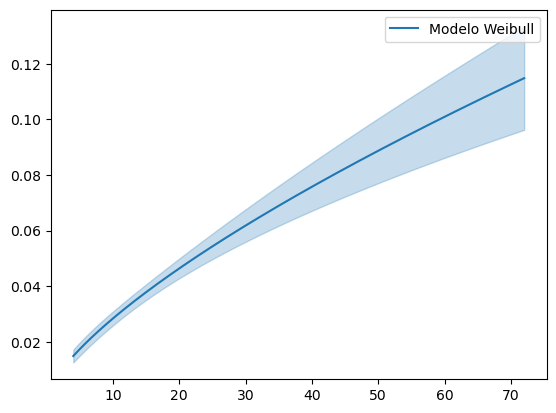

In [21]:
# b) Ajustar un modelo weibull y un log-normal
weib_credit = WeibullFitter().fit(credit['duration'], credit['full_repaid'])
weib_credit.print_summary()
weib_credit.plot_hazard(label = 'Modelo Weibull');

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 300 right-censored observations>
   number of observations = 1000
number of events observed = 700
           log-likelihood = -2904.87
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      3.06       0.02             3.01             3.10
sigma_   0.69       0.02             0.66             0.73

         cmp to      z      p   -log2(p)
mu_        0.00 128.38 <0.005        inf
sigma_     1.00 -16.14 <0.005     192.30
---
AIC = 5813.75

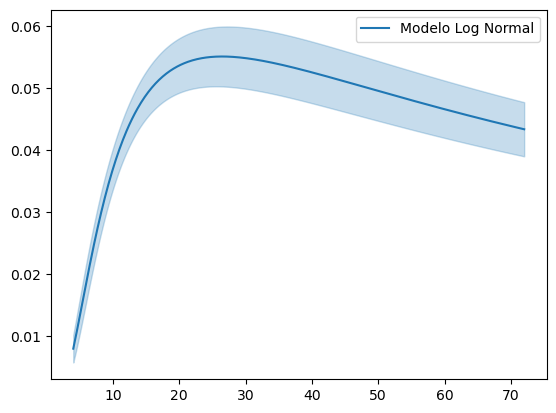

In [23]:
 #modelo log normal
log_credit = LogNormalFitter().fit(credit['duration'], credit['full_repaid'])
log_credit.print_summary()
log_credit.plot_hazard(label = 'Modelo Log Normal');

c) comenta que significa la grafica de la función de riesgo de la weibull respecto a si los clientes tardan en pagar
- **El modelo Weibull nos indica que conforme mas pase el tiempo, la probabilidad de que se cubra totalmente el pago también es mayor**

d) comenta que significa la grafica de la función de riesgo de la log-normal respecto a si los clientes tardan en pagar
- **La gráfica del modelo Log-normal indica también que conforme pasa el tiempo, la probabilidad de cubrir el pago aumenta, pero llegará a un limite de tiempo donde si la persona no cubre su pago a ese periodo, una vez que el tiempo supere ese limite la probabilidad de cubrir el pago en su totalidad se reducirá (es decir que será mas probable que no cubra su pago)**

2. Estima la función de supervivencia por el método de Kaplan-Meier para el tiempo que tardan los clientes en pagar y muestra su gráfica correspondiente

<AxesSubplot:xlabel='timeline'>

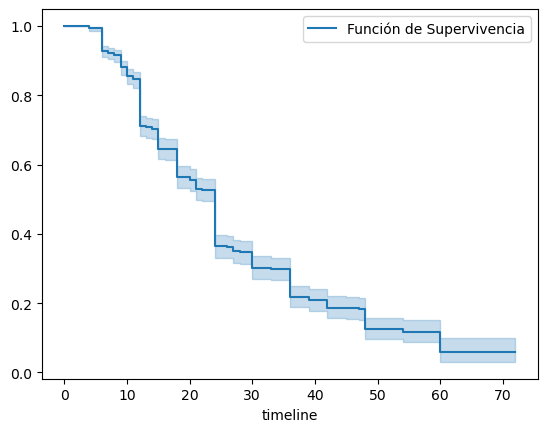

In [27]:
kmf_credit = KaplanMeierFitter().fit(credit['duration'], credit['full_repaid'])
kmf_credit.plot_survival_function(label = 'Función de Supervivencia')

3. Coloca la gráfica de kaplan Meier sobre la grafica de supervivencia log-normal 

<AxesSubplot:xlabel='timeline'>

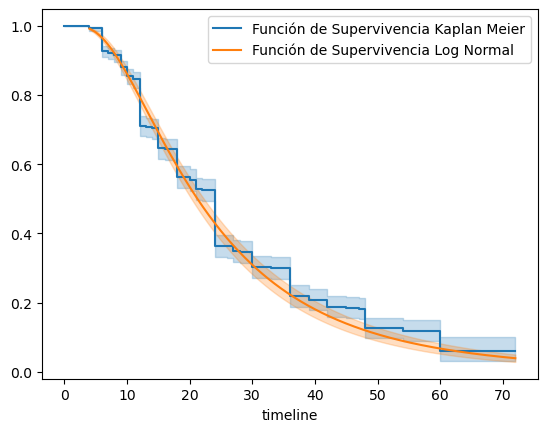

In [28]:
kmf_credit.plot_survival_function(label = 'Función de Supervivencia Kaplan Meier')
log_credit.plot_survival_function(label = 'Función de Supervivencia Log Normal')

4. Comenta si las graficas se parecen o no, y en que se diferencian
- **Las graficas muestran similitud en cuanto al comportamiento conforme pasa el tiempo, es decir que entre más tiempo pasa, menor es la probabilidad de que se cubra el pago, otra característica que comparten es la caída que existe en el intervalo de los 10 y 30 que es igual de pronunciada en ambos modelos**

5. El banco considera que los que piden préstado una gran cantidad de dinero en realidad nunca piensa pagar

a) calcula la mediana de la cantidad que pidieron prestado (amount of money borrowed), asigna un 1 a quienes se encuentran igual o arriba de la mediana (deben mucho) y 0 a los que se encuentran debajo de la mediana (deben poco)

b) Elabora y grafica juntas las funciones de supervivencia por el método de Kaplan-Meier para los que deben mucho y para los que deben poco.

c)Interpreta las graficas de supervivencia, ¿qué significan? ¿quién paga más rápido? ¿quién tarda en pagar más?  

d)Elabora un log-rank test para comprobar si las funciones de supervivencia de los que deben mucho y los que deben poco son distintas, e interpreta el resultado de la prueba

e) ¿el banco tenía razón? Explique

In [33]:
#  a)

mediana_credit = st.median(credit['amount'])
print(f'La mediana es: {mediana_credit}')
credit['mediana_range'] = credit['amount'].apply(lambda x: 1 if x >= mediana_credit else 0)
credit.head()

La mediana es: 2319.5


,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid,mediana_range
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,67,None,own,2,official,1,1,1,1,0
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,22,None,own,1,official,1,0,1,0,1
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,49,None,own,1,unskilled,2,0,1,1,0
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,45,None,free,1,official,2,0,1,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,53,None,free,2,official,2,0,1,0,1


<AxesSubplot:xlabel='timeline'>

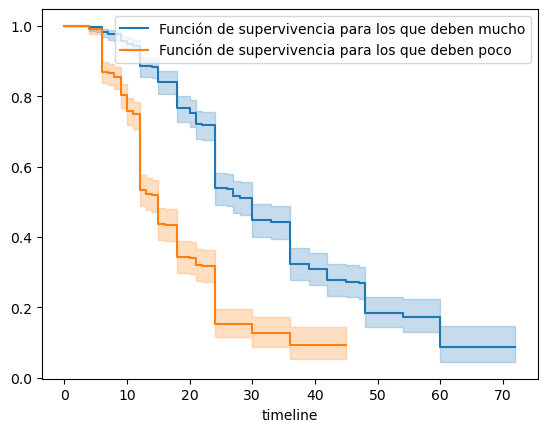

In [35]:
# b)

kmf_morosos = KaplanMeierFitter().fit(credit[credit['mediana_range'] == 1 ]['duration'], credit[credit['mediana_range'] == 1]['full_repaid'])
kmf_nomorosos = KaplanMeierFitter().fit(credit[credit['mediana_range'] == 0 ]['duration'], credit[credit['mediana_range'] == 0]['full_repaid'])

kmf_morosos.plot_survival_function(label = 'Función de supervivencia para los que deben mucho')
kmf_nomorosos.plot_survival_function(label = 'Función de supervivencia para los que deben poco')


**c)** 
- La función de los que deben mucho está por encima de la función de los que deben poco, la interpretación es que los que deben mucho suelen tardarse mucho mas tiempo en pagar que los que deben poco, esto tiene sentido debido a que los prestamos cuando son cantidades grandes, suelen pagarse en un lapso de tiempo muy largo (si es que se llegan a liquidar) a comparación que los prestamos pequeños que pueden demorarse un par de meses solamente.

In [41]:
# d)

#H0: B0 = B1 funciones de supervivencias iguales
#Ha: B0 != B1 funciones de supervivencias distintas
deben_mucho = credit.query('mediana_range == 1')
deben_poco = credit.query('mediana_range == 0')

lrt = logrank_test(deben_mucho['duration'], deben_mucho['full_repaid'],
                  deben_poco['duration'], deben_poco['full_repaid'])
lrt.print_summary()
print(f'Con un p-value {lrt.p_value.round(8)} < 0.05 Rechazamos H0 a un 95% de confianza\nSignifica que las funciones de supervivencia son distintas')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         609.84 <0.005    444.86

Con un p-value 0.0 < 0.05 Rechazamos H0 a un 95% de confianza
Significa que las funciones de supervivencia son distintas


**e)**
- El banco tiene razón en pensar que los que piden mucho dinero es probable que no paguen su deuda, al hacer la prueba de log rank test obtuvimos que las funciones de supervivencia son distintas, por lo que se concluye que la cantidad de dinero SI tiene efecto en el tiempo en que tarden en pagar debido a que se tardan demasiado o simplemente no lo vuelven a pagar jamás.

6. Elige seis variables para ajustar un modelo de cox de riesgos porporcionales. Antes de correr el modelo explica en qué sentido y por qué afectan el riesgo de pagar el préstamo cada una de las variables elegidas
- **amount**: es la cantidad de dinero que sin duda alguna influirá en si el cliente cubre su pago o no
- **present_residence**: Son los años que lleva viviendo en su casa, que lleve muchos años puede indicar estabilidad económica por lo cual es probable que sus finanzas esten estables (que cumpla con los pagos)
- **age**: La edad sin duda influirá ya que una persona joven es poco probable que ya cuente con ingresos estables como los de una persona mayor, por lo que su probabilidad de cumplimiento de pago puede verse afectada
- **number_of_credits**: La cantidad de creditos abiertos es importante, si tiene diferentes creditos abiertos puede significar que el banco se los otorga por su buen comportamiento
- **people_liable**: la cantidad de personas que dependen economicamente de las personas puede afectar a la economía, por lo que un imprevisto de esos puede afectar a la capacidad de pago de la persona
- **telephone**: 1 si la persona cuenta con telefono y 0 si no, el que no tenga telefono puede afectar al no tener comunicación con el banco y que le pueda recordar los pagos

In [43]:
cph = CoxPHFitter()
cph.fit(credit, duration_col = 'duration', event_col = 'full_repaid', formula = 'amount + present_residence + age + number_of_credits + people_liable + telephone')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4116.21
         time fit was run = 2023-04-02 18:49:07 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
age                 0.01       1.01       0.00             0.00             0.02                 1.00                 1.02
amount             -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
number_of_credits   0.12       1.13       0.07            -0.01             0.25                 0.99                 1.29
people_liable       0.02       1.02       0.11            -0.19             0.23                 0.83                 1.25
present_residence  -0.08       0.93       0.04            -0.15            -0.01                 0.86                 0.99
telephone           0.06       1.06       0.08            -0.09             0.22                 0.91                 1.24

                    cmp to      z      p   -log2(p)
covariate                                          
age                   0.00   2.87 <0.005       7.91
amount                0.00 -14.13 <0.005     148.11
number_of_credits     0.00   1.78   0.07       3.75
people_liable         0.00   0.19   0.85       0.23
present_residence     0.00  -2.18   0.03       5.08
telephone             0.00   0.77   0.44       1.18
---
Concordance = 0.73
Partial AIC = 8244.43
log-likelihood ratio test = 306.34 on 6 df
-log2(p) of ll-ratio test = 207.44

In [53]:
a = cph.summary.loc['amount', 'coef']
b = cph.summary.loc['amount', 'exp(coef)']
print(f'El coef y el exp(coef) respectivamente son: {a, 1-b}')

El coef y el exp(coef) respectivamente son: (-0.00030003059961964323, 0.00029998559494037735)


**7. Interpreta la regresión de Cox**

Tenemos:
- **H0: Las variables independientes (age, amount, etc) no tienen un efecto significativo sobre el evento (que pague o no)**
- **Ha: Las variables independientes si tienen un efecto significativo sobre el evento**

Por lo que sabemos, rechazamos H0 cuando p_valor < 0.05 (alfa), entonces gracias al modelo de Cox, obtenemos que las variables de edad, monto prestado y los años que lleva viviendo en su casa tienen un p_valor < 0.05, por lo que rechazamos H0 y podemos decir con un 95% de confianza que estas 3 variables si son signigicativas al momento de saber si el cliente pagará su crédito o si incumplirá en su responsabilidad. A su vez podemos tener las siguientes conclusiones:
- Por cada año extra que tiene la persona, el riesgo de cumplir el pago aumenta en un 1% en promedio
- Entre mas alta sea la cantidad de dinero prestado disminuye la probabilidad en promedio en un 0.02% de cumplir con el pago (es decir que aumenta la probabilidad de incumplimiento)
- Entre mas años tenga la persona viviendo en su residencia se reduce la probabilidad en promedio en un 7% de que cumpla con su pago, es decir que aumenta la posibilidad de incumplir

**8. Con base en el análisis hecho hasta ahora qué recomendación podría hacer al banco para mejorar sus políticas de préstamo**

Algunas recomendaciones que pueden hacer es que al momento de admitir a una persona a un credito, se revisen mas las caracteristicas del cliente, como vimos, entre mayor es la edad, es mas probable que se cumpla con el pago, por lo que una medida puede ser que a los clientes mas jovenes se les preste una cantidad proporcional a su edad. 

Otra medida sería que se tome mas importancia a la cantidad de dinero prestada ya que entre más alta sea la cantidad de dinero prestado, será menos probable que el cliente termine de pagar su préstamo.